黒(-1)の割合は 0.67


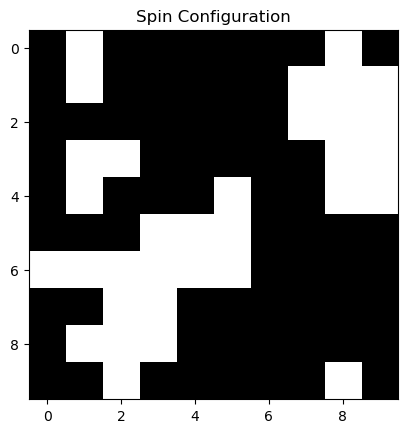

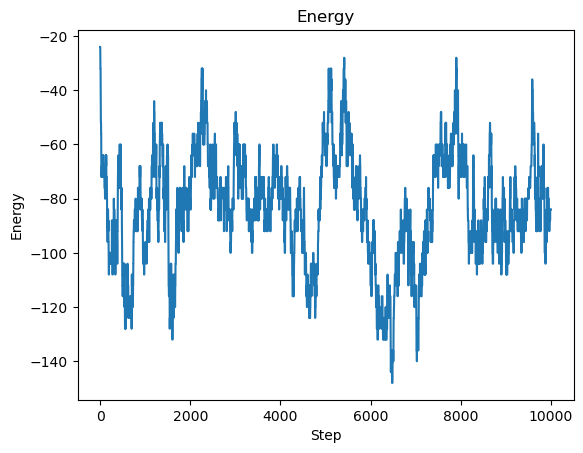

In [215]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 関数を定義
def metropolis_ising(L, T, num_steps, J=1):
    lattice = np.random.choice([-1, 1], size=(L, L))
    energies = []
    
    for step in range(num_steps):
        i = np.random.randint(L)
        j = np.random.randint(L)
        
        
        # 近傍のスピンの総和を計算（周期境界条件を適用）
        total = lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] + \
                lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
        
        # エネルギー差を計算
        delta_energy = 2 * J * lattice[i, j] * total
        
        if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / T):
            # スピンを反転させる
            lattice[i, j] *= -1
            
        energies.append(-J * np.sum(lattice * (np.roll(lattice, 1, axis=0) + np.roll(lattice, 1, axis=1))))
        
        # スピン変数全体を反転させるかどうかのif文(いらないかも)
        # 図だと黒の割合が必ず50%以上になるようにしている
        if np.sum(lattice==1) >= L*L/2:
            lattice = lattice*-1
        else:
            lattice = lattice

    return lattice, energies


# Metropolisモンテカルロ法によるサンプリング
# L=10, T=3, num_steps=10000
lattice, energies = metropolis_ising(10, 3, 10000)

print("黒(-1)の割合は",np.sum(lattice==-1)/lattice.size)

# スピン配位の可視化
plt.imshow(lattice, cmap='gray', interpolation='nearest')
plt.title("Spin Configuration")
plt.show()

# エネルギーの変化の可視化
plt.plot(energies)
plt.title("Energy")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.show()



In [140]:
print(np.ndarray.flatten(lattice))

[-1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
  1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1  1 -1 -1 -1
 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1
 -1 -1 -1 -1]


# T=2のデータ

In [200]:
L = 10 
T = 2.0
num_steps = 10000

data_T2 = np.arange(100)

# 一次元データを得る
for i in tqdm(range(4)):
    
    lattice, energies = metropolis_ising(L, T, num_steps)
    # 配列を一次元化する
    data_T2 = np.vstack((data_T2, np.ravel(lattice)))

# 余分な1行目の削除    
data_T2 = np.delete(data_T2, 0, 0)

print(data_T2)

100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

[[-1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
   1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1

In [201]:
print(data_T2)

[[-1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
   1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1

In [202]:
print(data_T2.shape)

(4, 100)


# T=3のデータ

In [203]:
L = 10 
T = 3.0
num_steps = 10000

data_T3 = np.arange(100)

# 一次元データを得る
for i in tqdm(range(4)):
    
    lattice, energies = metropolis_ising(L, T, num_steps)
    # 配列を一次元化する
    data_T3 = np.vstack((data_T3, np.ravel(lattice)))

# 余分な1行目の削除    
data_T3 = np.delete(data_T3, 0, 0)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
   1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
  -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1
  -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1
  -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1  1
   1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1
  -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1
  -1 -1 -1 -1]
 [ 1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1
  -1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1
   1 -1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
   1  1  1  1]
 [-1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1

# T=4のデータ

In [204]:
L = 10 
T = 4.0
num_steps = 10000

data_T4 = np.arange(100)

# 一次元データを得る
for i in tqdm(range(4)):
    
    lattice, energies = metropolis_ising(L, T, num_steps)
    # 配列を一次元化する
    data_T4 = np.vstack((data_T4, np.ravel(lattice)))

# 余分な1行目の削除    
data_T4 = np.delete(data_T4, 0, 0)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

[[ 1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1
  -1 -1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1
  -1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1 -1  1
   1  1  1  1]
 [ 1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1
   1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1
  -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1
  -1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1 -1
  -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1
  -1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1
   1  1  1 -1]
 [-1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1  1 -1  1 -1  1

# T=5のデータ

In [205]:
L = 10 
T = 5.0
num_steps = 10000

data_T5 = np.arange(100)

# 一次元データを得る
for i in tqdm(range(4)):
    
    lattice, energies = metropolis_ising(L, T, num_steps)
    # 配列を一次元化する
    data_T5 = np.vstack((data_T5, np.ravel(lattice)))

# 余分な1行目の削除    
data_T5 = np.delete(data_T5, 0, 0)

100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

[[ 1 -1 -1  1  1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1
  -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1
   1 -1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1
  -1 -1 -1 -1]
 [-1 -1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1 -1  1
   1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1
  -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1
   1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1
   1 -1  1  1]
 [-1  1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
  -1 -1  1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1
  -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1
   1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1
  -1  1 -1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1  1  1  1  1 -1 -1

# T=6のデータ

In [206]:
L = 10 
T = 6.0
num_steps = 10000

data_T6 = np.arange(100)

# 一次元データを得る
for i in tqdm(range(4)):
    
    lattice, energies = metropolis_ising(L, T, num_steps)
    # 配列を一次元化する
    data_T6 = np.vstack((data_T6, np.ravel(lattice)))

# 余分な1行目の削除    
data_T6 = np.delete(data_T6, 0, 0)

100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

[[ 1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1
   1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1
  -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1
   1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1  1  1
   1  1  1 -1]
 [ 1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1
  -1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1
   1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1
   1 -1 -1 -1]
 [-1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1
   1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1  1
  -1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1
  -1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  -1 -1 -1  1]
 [-1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1  1